In [ ]:
#Instructions: 

#all values are in SI unit


In [ ]:
#Import packages

import numpy as np
import matplotlib.pyplot as plt


In [84]:
#physical constants
u_0 = 4*np.pi*10**(-7) 
R_gas = 8.3145
e = 1.6*10**(-19)
#all the parameter values
V = 2800 #voltage of capacitor
C = 3300 * 10**(-6) #capacitance 
E_plasma = 100*e #energy of plasma

p = 1.72 * 10**(-8) #resistivity 
r_2 = 0.001 #radius of cross section. estimate ~ 1 mmm

N = 10 # number of turns for 1 coil 
r = 0.01 # 1 cm

k = 0.18 #coupling coefficient. estimated value (from a youtube video). Should prob measure in the lab

kb =1.380649 * 10**(-23)  #Boltzman constant

In [ ]:
def calculate_dimension():
    def 

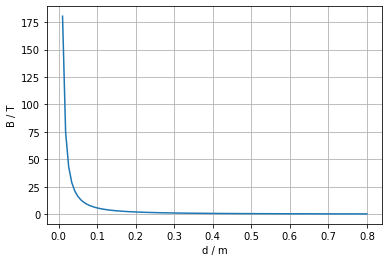

In [66]:
E = 0.5*C*V*V #theoretical energy stored by the capacitor 
d=np.linspace(0.01,0.8,100) #dimension of the cube. Generate values between 0.01 and 0.8 m 
B =np.sqrt(2*u_0*E/d**3) #Magnetic flux density associated with each d value

#Plotting the graph
plt.plot(d,B)
plt.ylabel('B / T')
plt.xlabel('d / m')
plt.grid()

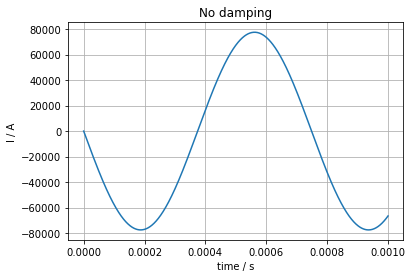

In [81]:
l = N*2*r_2
L_1 = u_0*N**2*np.pi*r**2/l #inductance of coil. unit in Henry
L_2 = L_1
L_total = L_1+L_2 + k*np.sqrt(L_1*L_2) #total inductance
w_0 = 1/np.sqrt(L_total*C) #reasonant frequency 
t = np.linspace(0,0.001,1000) #time

#initial condition 
q_0 = C*V #initial charge on capacitor
I_0 = -q_0*w_0 #initial current in the circuit
I = I_0*np.sin(w_0*t)

#plot
plt.plot(t,I)
plt.ylabel('I / A')
plt.xlabel('time / s')
plt.title('No damping')
plt.grid()

In [58]:
#resistance of the coil

R = p*2*np.pi*r*(N*2)/(np.pi*r_2**2)



In [59]:
#Maximum value of R for oscillation
R_max = 2*np.sqrt(L_total/C)
print('The max value of R for oscillation is',R_max)

The max value of R for oscillation is 0.07222143993659434


In [82]:
#Testing which type of damping for LCR

gamma = R/L_total #gamma factor in damping
check =  (gamma**2)/4 - w_0**2 #this checks the square root part of the characteristic root


if check < 0:
    print('Based on the parameter values, we have an UNDERDAMPED oscillation ')
elif check == 0:
        print('Based on the parameter values, we have an CRITICALLY DAMPED oscillation')
else: 
            print('Based on the parameter values, we have an OVERDAMPED oscillation')

Based on the parameter values, we have an UNDERDAMPED oscillation 


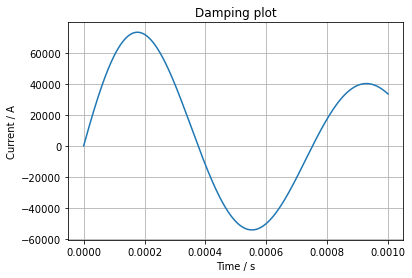

In [83]:
#damping plot

w_d = np.sqrt(w_0**2-(gamma/2)**2) #oscillating frequency

i = V/(w_d*L) * np.exp(-gamma*t/2)*np.sin(w_d*t)

plt.plot(t,i)
plt.xlabel('Time / s')
plt.ylabel('Current / A')
plt.title('Damping plot')
plt.grid()